7/3/2018
===

>### Below I attempt to load test isochrone data from Leo Girardi's website.  The assumed age was 1.0e10 with metallicity of Z=0.0152.  Here is the output header from the test data:
>#### File generated by CMD 3.0 (http://stev.oapd.inaf.it/cmd) on Tue Jul  3 22:19:35 CEST 2018
>#### isochrones PARSEC release v1.2S + COLIBRI release PR16, as in Marigo et al. 2017
>#### Basic reference: Marigo et al. (2017), ApJ, 835, 77
>#### Photometric system: 2MASS+Spitzer+WISE+Washington+DDO51
>#### O-rich circumstellar dust ignored
>#### C-rich circumstellar dust ignored
>#### Kind of output: isochrone tables

In [3]:
from astropy.table import Table

cat = Table.read('C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\Girardi\\WISE_ddo51_isochrone_1e10.dat',format='ascii')

In [ ]:
cat

>### Note that, unfortunately, the columns above do not have labels.  I will have to determine independently what the columns are indicating.

7/4/2018
===
>### The table headers were not printing because they were commented out.  Output header:
>### File generated by CMD 3.0 (http://stev.oapd.inaf.it/cmd) on Wed Jul  4 00:24:24 CEST 2018
>### isochrones PARSEC release v1.2S + COLIBRI release PR16, as in Marigo et al. 2017
>### Basic reference: Marigo et al. (2017), ApJ, 835, 77
>### Photometric system: 2MASS+Spitzer+WISE+Washington+DDO51
>### O-rich circumstellar dust ignored
>### C-rich circumstellar dust ignored
>### Kind of output: isochrone tables

In [1]:
from astropy.table import Table

cat = Table.read('C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\Girardi\\WISE_ddo51_isochrone_5e9_range.dat',format='ascii')



In [ ]:
cat

>### I have learned that W1 is the UV photometer and W2 is the blue photometer in WISE.
>### Below I examine the Girardi isochrone data that was downloaded.  I plot the isochrones in W1-DDO51 vs. W1-W2 space, and then I compare it to the calibration data with the same photometric system.

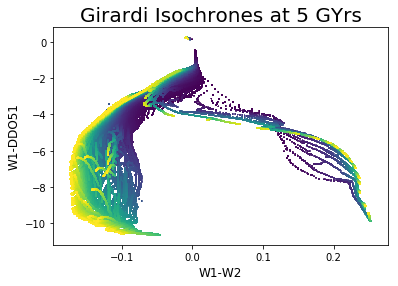

In [2]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib nbagg

#Define graph axes
x = cat['W1mag']-cat['W2mag']
y = cat['W1mag']-cat['DDO51_finfmag']

plt.scatter(x,y,marker='+',c=cat['Z'],s=3)
plt.title('Girardi Isochrones at 5 GYrs',fontsize=20)
plt.ylabel('W1-DDO51',rotation='vertical',labelpad=5,fontsize=12)
plt.xlabel('W1-W2',fontsize=12)
plt.show()

In [3]:
cat2 = Table.read('C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\apogeegaia_allwise_giants_r.csv',format='csv')

In [ ]:
cat2

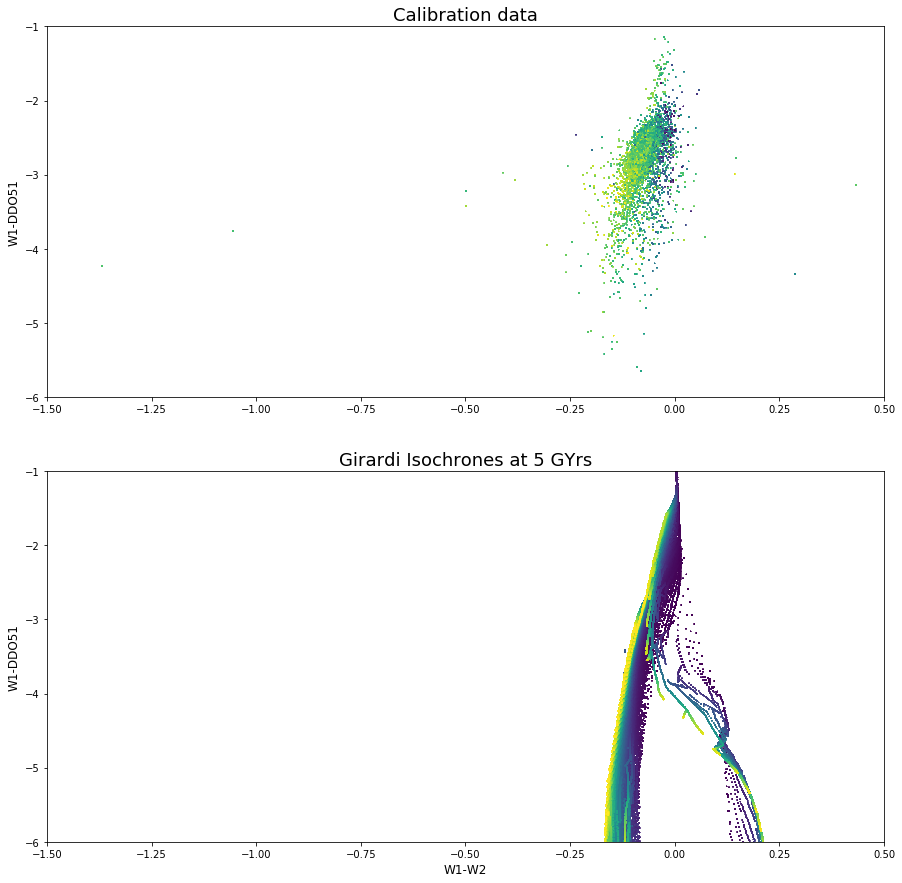

In [21]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib nbagg

#Create subplot
f, (ax1, ax2) = plt.subplots(2, 1)

#Calibration data
x1 = cat2['W1mag']-cat2['W2mag']
y1 = cat2['W1mag']-cat2['DDO51']

ax1.scatter(x1,y1,marker='+',c=cat2['METALS'],s=3)
ax1.set_title('Calibration data',fontsize=18)
ax1.set_ylim([-6,-1])
ax1.set_xlim([-1.5,0.5])
ax1.set_ylabel('W1-DDO51',rotation='vertical',labelpad=5,fontsize=12)
#plt.xlabel('W1-W2',fontsize=12)

#Isochrone data from Girardi website
x2 = cat['W1mag']-cat['W2mag']
y2 = cat['W1mag']-cat['DDO51_finfmag']

ax2.scatter(x2,y2,marker='+',c=cat['Z'],s=3)
ax2.set_title('Girardi Isochrones at 5 GYrs',fontsize=18)
ax2.set_ylim([-6,-1])
ax2.set_xlim([-1.5,0.5])
ax2.set_ylabel('W1-DDO51',rotation='vertical',labelpad=5,fontsize=12)
ax2.set_xlabel('W1-W2',fontsize=12)
#plt.tight_layout()

f.set_figheight(15)
f.set_figwidth(15)
plt.show()